In [2]:
import pandas as pd
%matplotlib inline
xls = pd.ExcelFile("tabula-2015 Pedestrians city.xlsx")
city = xls.parse('tabula-2015 Pedestrians city')
by_year = xls.parse('Sheet1')
by_age = xls.parse('Sheet2')

In [3]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4% 2.82 1.53,NaN,NaN
1,"Los Angeles, CA",3971883,224,85,37.9% 5.64 2.14,NaN,NaN
2,"Chicago, IL",2720546,121,46,38.0% 4.45 1.69,NaN,NaN
3,"Houston, TX",2296224,211,62,29.4% 9.19 2.70,NaN,NaN
4,"Philadelphia, PA",1567442,93,26,28.0% 5.93 1.66,NaN,NaN


In [14]:
by_year = by_year.dropna()
by_year

,Year,Total Fatalities,Pedestrian Fatalities,Percentage of Total Fatalities
1,2006.0,42708.0,4795.0,0.11
3,2007.0,41259.0,4699.0,0.11
5,2008.0,37423.0,4414.0,0.12
7,2009.0,33883.0,4109.0,0.12
9,2010.0,32999.0,4302.0,0.13
11,2011.0,32479.0,4457.0,0.14
13,2012.0,33782.0,4818.0,0.14
15,2013.0,32893.0,4779.0,0.15
17,2014.0,32744.0,4910.0,0.15
19,2015.0,35092.0,5376.0,0.15


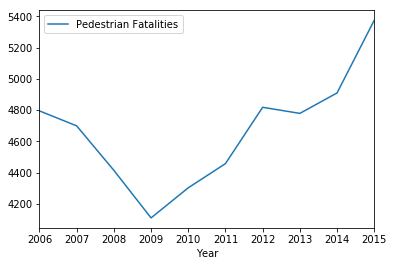

In [37]:
by_year.plot(kind = "line", x="Year", y ="Pedestrian Fatalities")

In [15]:
by_age.head()


,Age,Total Killed,Pedestrians Killed,Percentage Killed who were Pedestriansa
0,0â€“4,373,77,0.21
1,5â€“9,353,73,0.21
2,10â€“14,406,83,0.20
3,Children (â‰¤14),1132,233,0.21
4,15â€“19,2521,223,0.09


In [18]:
by_age["Age"]  = by_age["Age"].str.replace("â€“", "-")

In [21]:
by_age["Age"] = by_age["Age"].str.replace("â‰¤", "<")
by_age["Age"] = by_age["Age"].str.replace("*", "")


In [23]:
by_age.tail()

,Age,Total Killed,Pedestrians Killed,Percentage Killed who were Pedestriansa
15,70-74,1316,216,0.16
16,75-79,1069,180,0.17
17,80+,1981,302,0.15
18,Seniors (65+),6165,1002,0.16
19,Total,35092,5376,0.15


In [6]:
city["Total Traffic 100,000 Population"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[1]
city["Fatalities Total Pedestrian"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[2]

In [7]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4% 2.82 1.53,2.82,1.53
1,"Los Angeles, CA",3971883,224,85,37.9% 5.64 2.14,5.64,2.14
2,"Chicago, IL",2720546,121,46,38.0% 4.45 1.69,4.45,1.69
3,"Houston, TX",2296224,211,62,29.4% 9.19 2.70,9.19,2.70
4,"Philadelphia, PA",1567442,93,26,28.0% 5.93 1.66,5.93,1.66


In [8]:
city["Percentage of Fatality Rate per"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[0]


In [9]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4%,2.82,1.53
1,"Los Angeles, CA",3971883,224,85,37.9%,5.64,2.14
2,"Chicago, IL",2720546,121,46,38.0%,4.45,1.69
3,"Houston, TX",2296224,211,62,29.4%,9.19,2.70
4,"Philadelphia, PA",1567442,93,26,28.0%,5.93,1.66


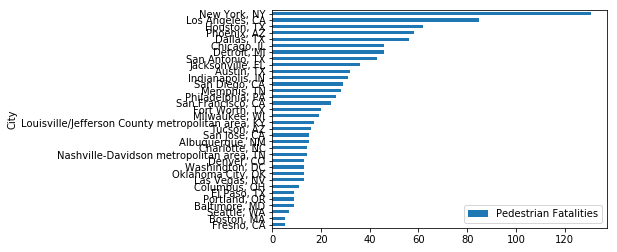

In [29]:
city.sort_values(by = "Pedestrian Fatalities", ascending  = True).plot(kind = "barh", x = "City", y = "Pedestrian Fatalities")




In [10]:
State = pd.read_csv("tabula-2015 Pedestrians Traffic Safety Fact Sheet.csv")
State.head()

,State,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Total Traffic Fatalities,"Pedestrian Fatalities per 100,000 Population"
0,Alabama,"4,858,979",849,98,11.5%,2.02
1,Alaska,"738,432",65,12,18.5%,1.63
2,Arizona,"6,828,065",893,153,17.1%,2.24
3,Arkansas,"2,978,204",531,43,8.1%,1.44
4,California,"39,144,818","3,176",742,23.4%,1.90


In [24]:
Violations = pd.read_csv("Moving Violations NYC - Sheet1.csv")
Violations.head()

,Offense Description,MTD2017,YTD2017,Unnamed: 3
0,Backing Unsafely,113,457,http://www1.nyc.gov/site/nypd/stats/reports-an...
1,Brake Lights (Defect.or Improper),804,3176,NaN
2,"Bus Lane, Driving in",215,608,NaN
3,Cell Phone,6084,24984,NaN
4,Commercial Veh on Pkwy,171,597,NaN


In [35]:
Violations = Violations[Violations["Offense Description"] != "CitywideTOTAL Movers"]

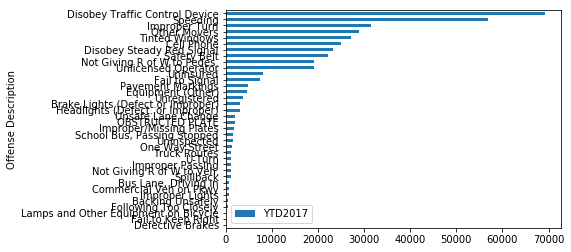

In [36]:
Violations.sort_values(by = "YTD2017").plot(kind = "barh", x = "Offense Description", y = "YTD2017")